# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos para el municipio de YOPAL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
yopal = pd.read_csv('../dengue_data/Yopal.csv')
df = pd.DataFrame(yopal)

### *Número de casos reportados por año*

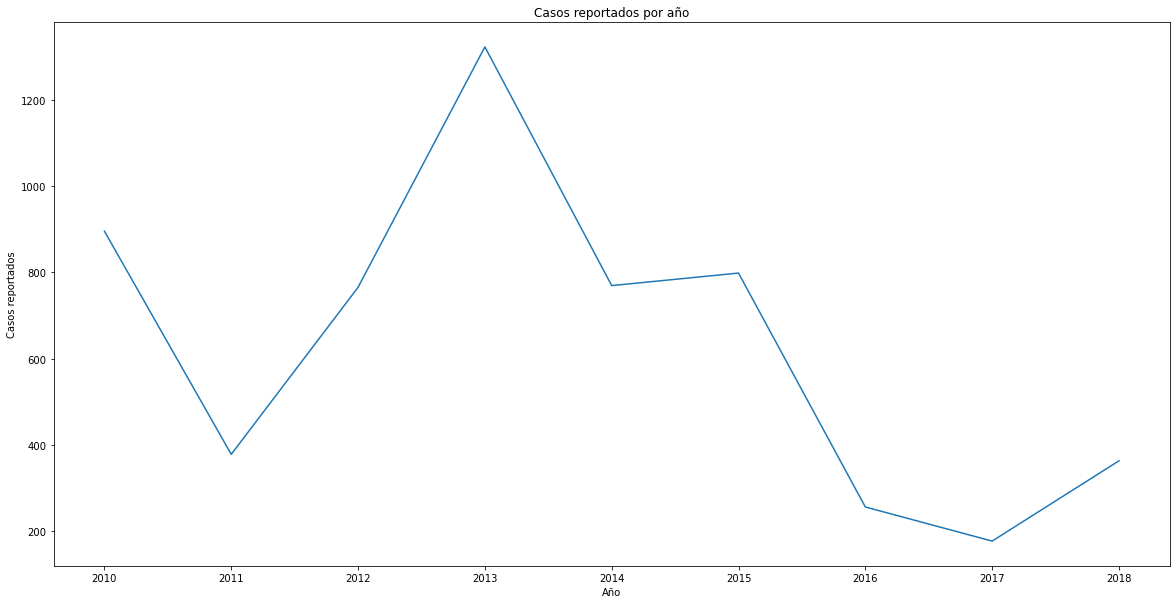

In [3]:
years = df['Ano'].value_counts().sort_index().plot(kind='line', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

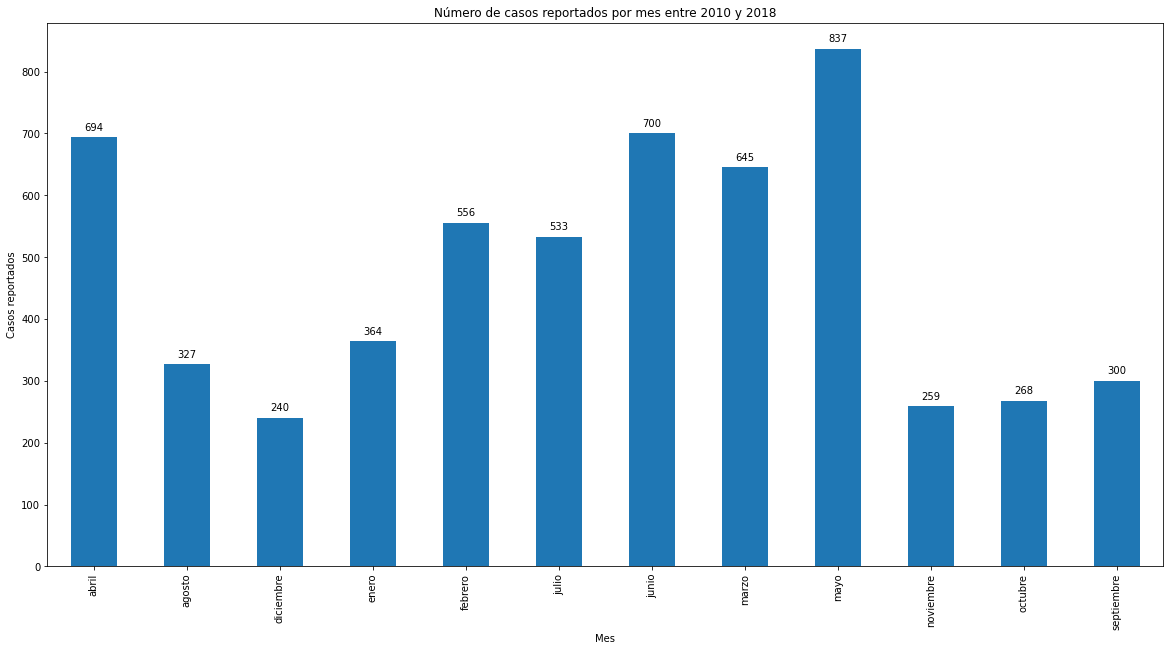

In [4]:
months = df['MesOcurrencia'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
months.set_xlabel('Mes')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes entre 2010 y 2018')

for p in months.patches:
    months.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

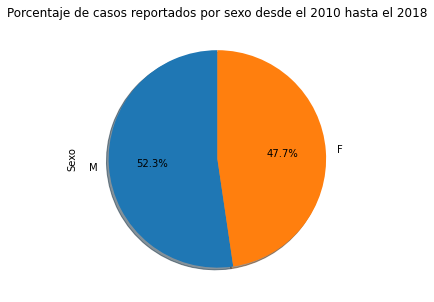

In [5]:
gender = df['Sexo'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

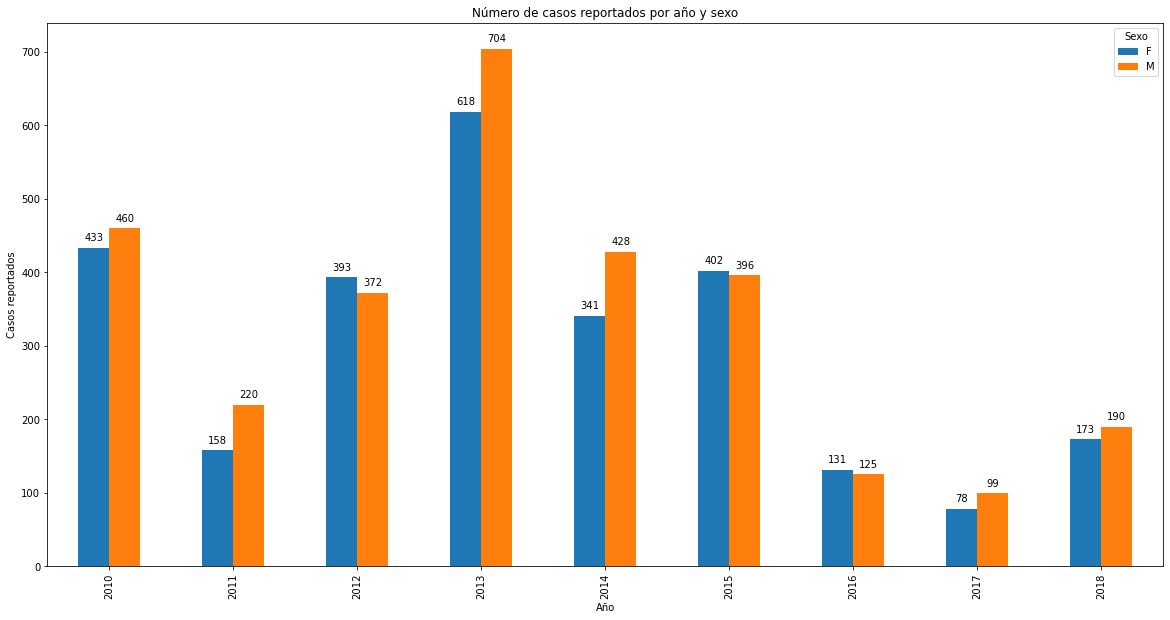

In [6]:
genders_by_year = yopal.groupby(["Ano", 'Sexo']).size().unstack(level=1).plot(kind='bar', figsize=(20,10))

genders_by_year.set_xlabel('Año')
genders_by_year.set_ylabel('Casos reportados')
genders_by_year.set_title('Número de casos reportados por año y sexo')

for p in genders_by_year.patches:
    genders_by_year.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### *Número de casos reportados por comuna*

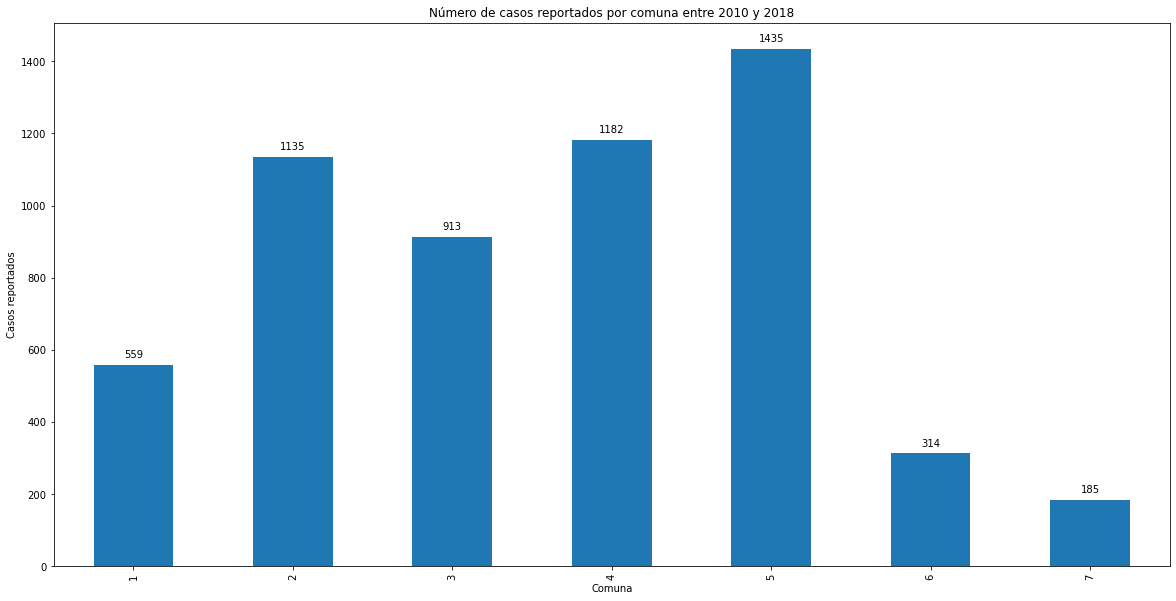

In [7]:
commune = df['Comuna'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Comuna')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

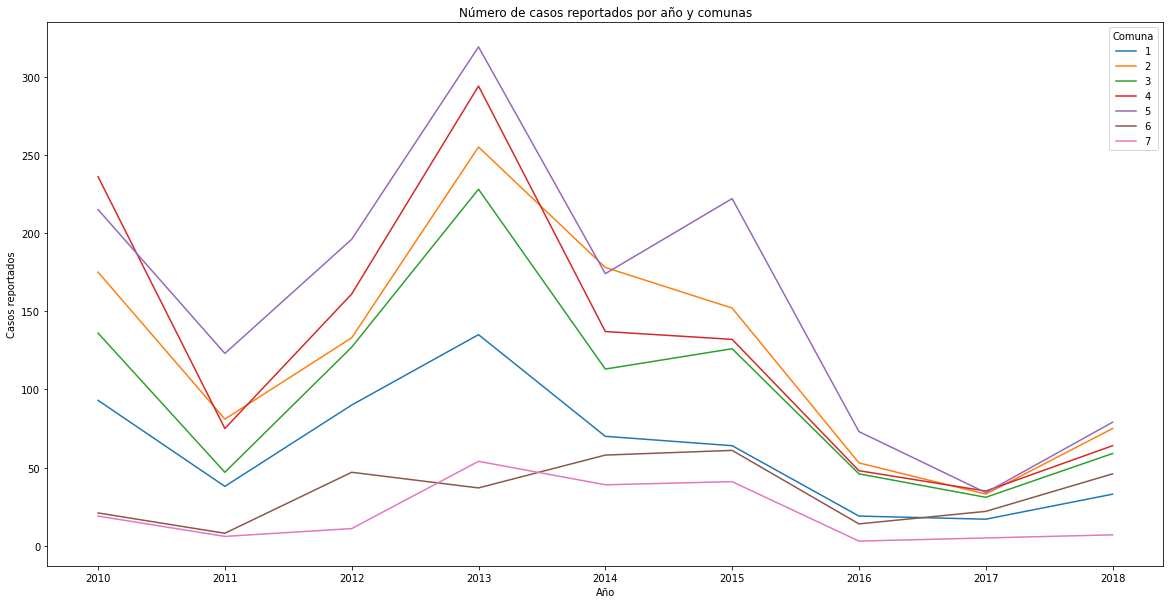

In [8]:
communes_by_year = yopal.groupby(["Ano", 'Comuna']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

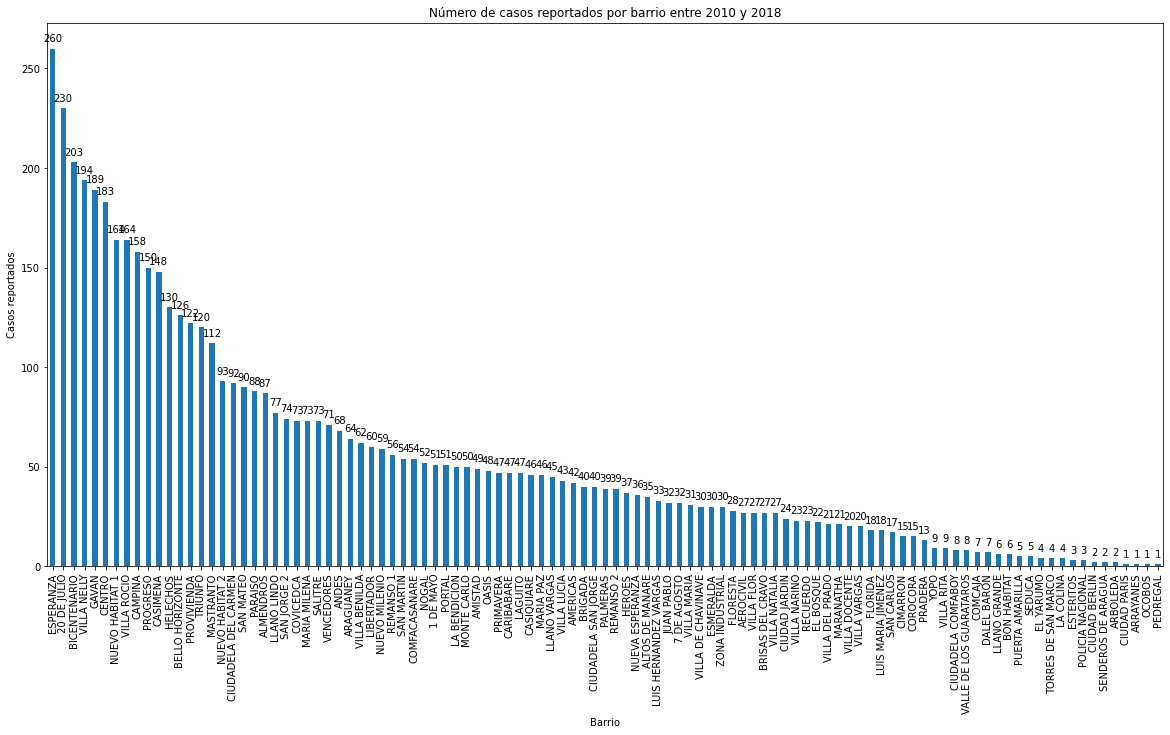

In [9]:
neighborhood = df['Barrio'].value_counts().plot(kind='bar', figsize=(20,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por rango de edad*

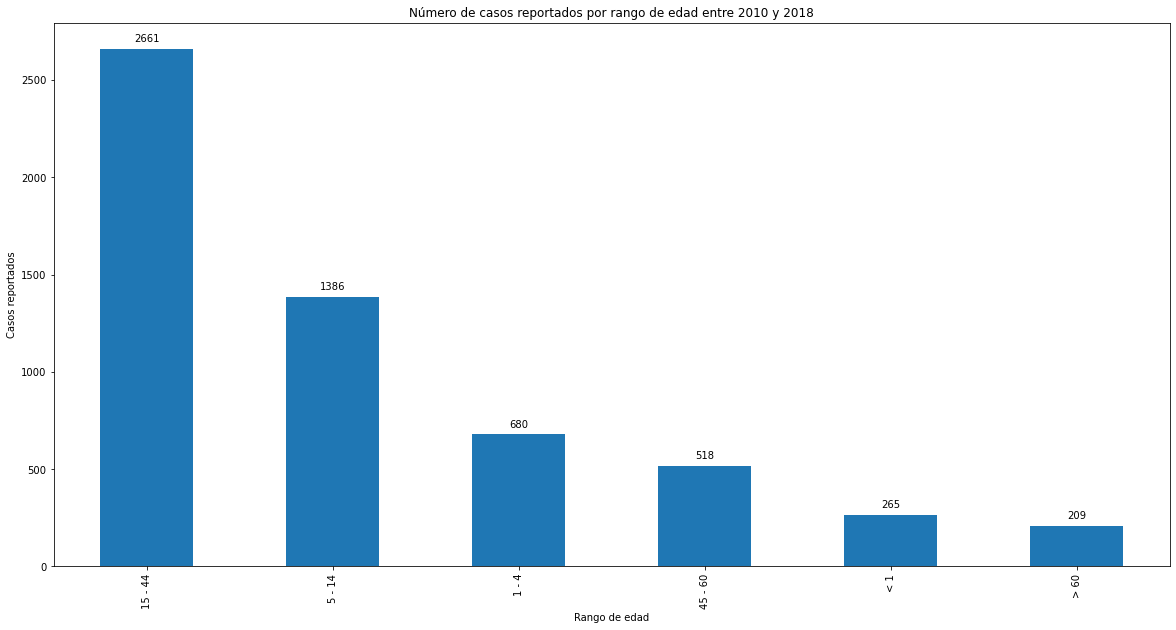

In [10]:
age_range = df['GrupoEdad'].value_counts().plot(kind='bar', figsize=(20,10))
age_range.set_xlabel('Rango de edad')
age_range.set_ylabel('Casos reportados')
age_range.set_title('Número de casos reportados por rango de edad entre 2010 y 2018')

for p in age_range.patches:
    age_range.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y rango de edad')

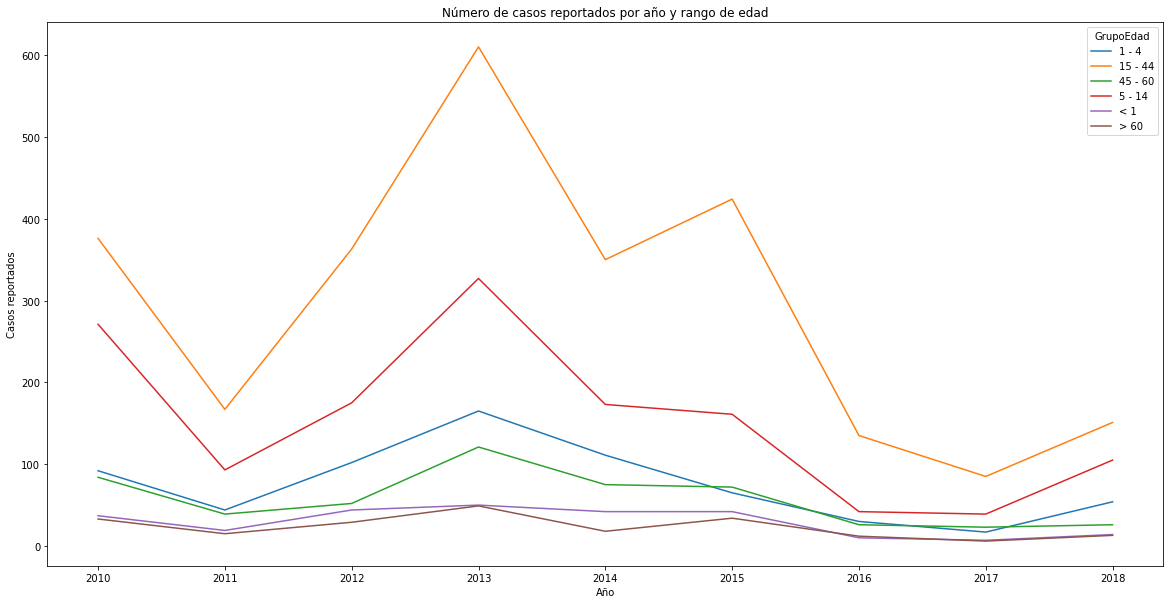

In [11]:
age_by_year = yopal.groupby(["Ano", 'GrupoEdad']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

age_by_year.set_xlabel('Año')
age_by_year.set_ylabel('Casos reportados')
age_by_year.set_title('Número de casos reportados por año y rango de edad')

Text(0.5, 1.0, 'Casos reportados por día')

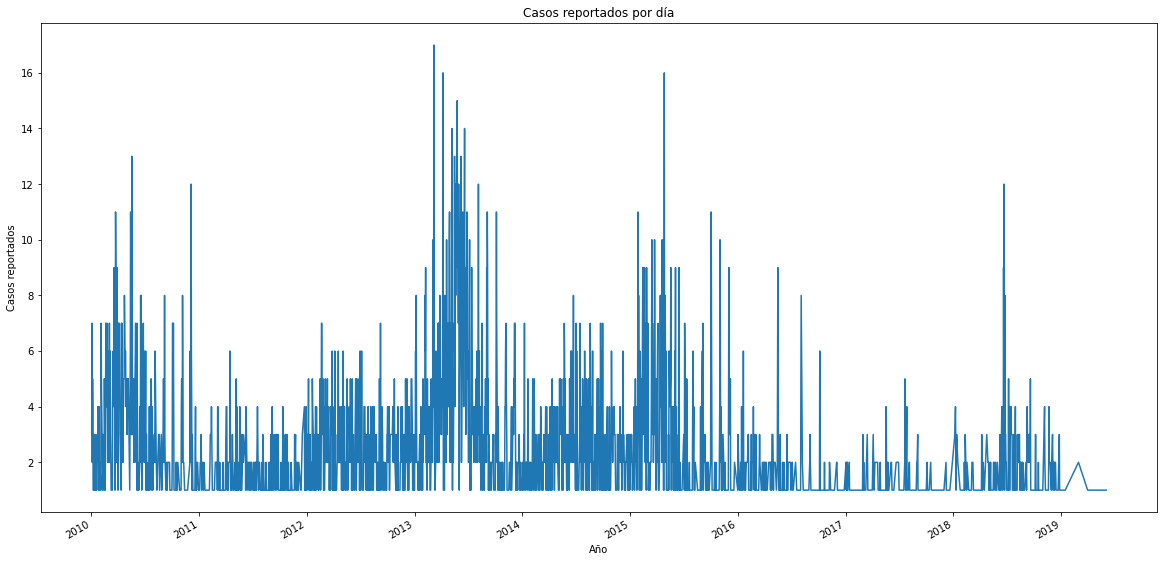

In [12]:
df["FecNot"]=pd.to_datetime(df['FecNot'])
df.sort_values(["FecNot"])
days = df['FecNot'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

Text(0.5, 1.0, 'Número de casos reportados por año y mes')

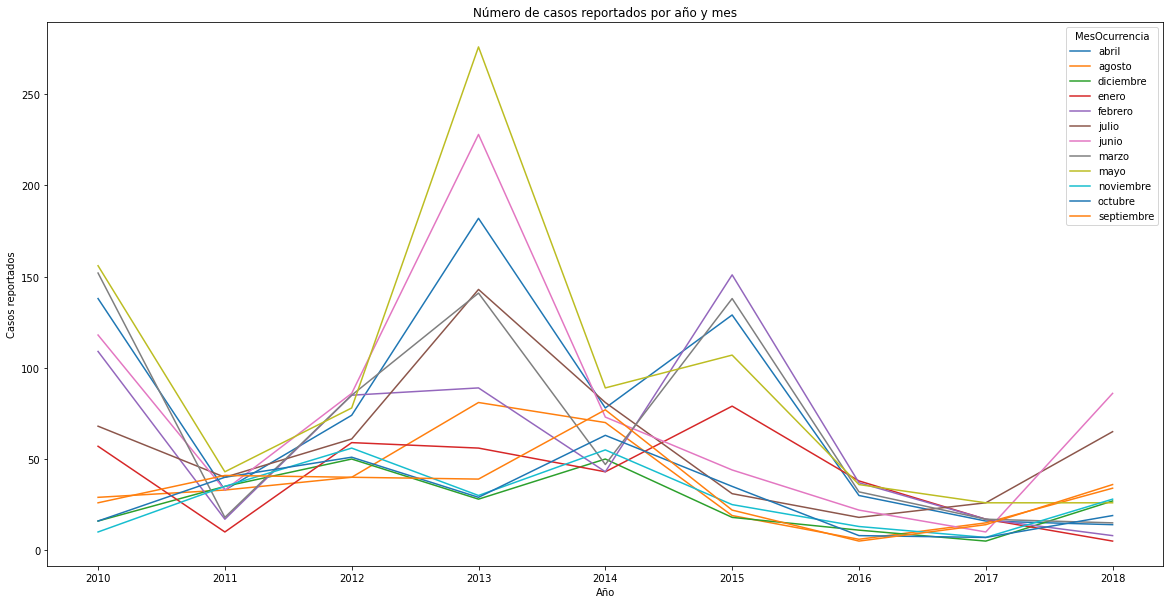

In [13]:
months = yopal.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
months.set_xlabel('Año')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por año y mes')

## ANÁLISIS DE SERIES DE TIEMPO

In [14]:
from statsmodels.tsa.stattools import adfuller

### *Pruebas de hipóstesis para determinar si el modelo es estacional o no* | DICKEY-FULLER TEST

**Hipótesis nula:** La serie de tiempo no es estacional  
**Hipótesis del investigador:** La serie de tiempo es estacional

*Si el estadístico ADF < Valor crítico entonces rechazo la hipótesis nula*  
*Si el estadístico ADF > Valor crítico entonces acepto la hipótesis nula*

In [15]:
results = adfuller(df['Ano'].value_counts().sort_index())
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    

Estadístico ADF: -1.702450
p-value: 0.429851
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Acepta Ho: La serie de tiempo no es estacionaria


In [17]:
df["Diff_Value"] = df["Ano"].value_counts().sort_index().diff()
diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]
ts_values_orig = df["Ano"].value_counts().sort_index()
ts_values = ts_values_orig[:-1]
X = sm.add_constant(ts_values)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     2.898
Date:                Tue, 15 Sep 2020   Prob (F-statistic):              0.140
Time:                        11:45:58   Log-Likelihood:                -57.870
No. Observations:                   8   AIC:                             119.7
Df Residuals:                       6   BIC:                             119.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.6765    292.019      1.276      0.2